<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
#!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y


CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/anaconda/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https//conda.anaconda.org/anaconda/win-64'




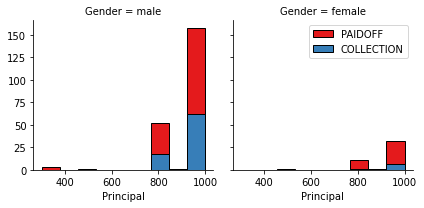

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

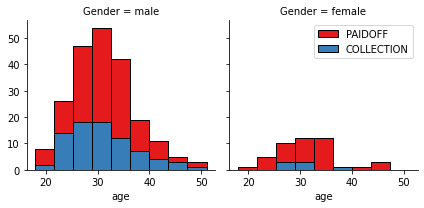

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


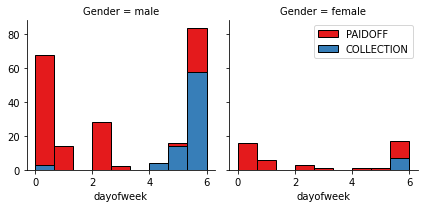

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

Replacing loan_status values with 0 and 1

In [19]:
df['loan_status']=df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [20]:
y = df['loan_status'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train:', X_train.shape,  y_train.shape)
print ('Test:', X_test.shape,  y_test.shape)

Train: (276, 8) (276,)
Test: (70, 8) (70,)


## Normalize Data After Train Test Split


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [40]:
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

In [41]:
X_train[0:5]

array([[ 0.56081126, -0.9677917 ,  0.69858179, -0.40565621, -1.17444044,
        -0.40565621, -0.90321065,  1.21007674],
       [ 0.56081126,  0.9437816 , -0.81959596, -0.40565621,  0.85146932,
        -0.40565621,  1.10716144, -0.82639387],
       [ 0.56081126,  0.9437816 ,  0.02383612, -0.40565621, -1.17444044,
        -0.40565621, -0.90321065,  1.21007674],
       [ 0.56081126, -0.9677917 , -0.98828237, -0.40565621,  0.85146932,
        -0.40565621, -0.90321065,  1.21007674],
       [ 0.56081126,  0.9437816 , -0.48222312, -0.40565621, -1.17444044,
        -0.40565621, -0.90321065,  1.21007674]])

In [42]:
X_test[0:5]

array([[ 0.33474248,  0.83916906, -0.19614926, -0.47756693,  0.74535599,
        -0.2773501 ,  1.26197963, -1.05887304],
       [-1.70282047, -0.9301633 , -0.19614926, -0.47756693,  0.74535599,
        -0.2773501 , -0.79240582,  0.94440028],
       [ 0.33474248, -0.9301633 , -0.04012144, -0.47756693, -1.34164079,
        -0.2773501 ,  1.26197963, -1.05887304],
       [ 0.33474248,  0.83916906, -1.13231619, -0.47756693, -1.34164079,
        -0.2773501 , -0.79240582,  0.94440028],
       [ 0.33474248,  0.83916906,  0.42796202, -0.47756693, -1.34164079,
        -0.2773501 , -0.79240582,  0.94440028]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [54]:
accuracies = []
k_max = 1
acc_max = 0
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = knn.predict( X_test )
    accuracies.append(accuracy_score(y_test, y_pred))
for x in range (len(accuracies)):
    print(x, accuracies[x])

0 0.6428571428571429
1 0.7571428571428571
2 0.7142857142857143
3 0.7714285714285715
4 0.7
5 0.7857142857142857
6 0.7428571428571429
7 0.7428571428571429
8 0.7285714285714285
9 0.7571428571428571
10 0.6714285714285714
11 0.6857142857142857
12 0.6857142857142857
13 0.6857142857142857
14 0.6714285714285714
15 0.6857142857142857
16 0.6571428571428571
17 0.6857142857142857
18 0.6714285714285714
19 0.7
20 0.7
21 0.6857142857142857
22 0.7
23 0.7142857142857143
24 0.7285714285714285
25 0.7571428571428571
26 0.7142857142857143
27 0.7857142857142857
28 0.7714285714285715


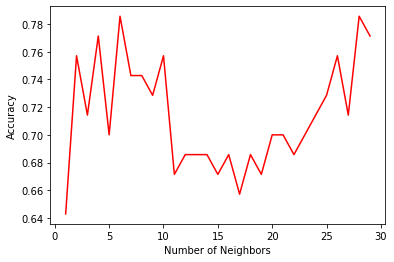

Maximum Accuracy obtained - 


,0
5,0.785714


In [55]:
plt.plot(range(1,30),accuracies,'r')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.show()
accuracy = pd.DataFrame(accuracies)
print("Maximum Accuracy obtained - " )
accuracy.sort_values(by = 0, ascending = False)[0:1]

In [86]:
from sklearn.metrics import jaccard_score
from sklearn import metrics

print("We take k = 5 since it gives maximum accuracy.")
knn = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
print("By Jaccard Index, accuracies: ")
print("Train set: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set: ", metrics.accuracy_score(y_test, knn.predict(X_test)))
print("By F1 index, accuracies: ")
print("Train set: ", metrics.f1_score(y_train, knn.predict(X_train), average='weighted'))
print("Test set: ", metrics.f1_score(y_test, knn.predict(X_test), average='weighted'))

We take k = 5 since it gives maximum accuracy.
By Jaccard Index, accuracies: 
Train set:  0.8188405797101449
Test set:  0.7
By F1 index, accuracies: 
Train set:  0.8068471551261407
Test set:  0.7034625628884287


# Decision Tree


In [61]:
from sklearn.tree import DecisionTreeClassifier
accud = []
for d in range(1,20):
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = d).fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accud.append(accuracy_score(y_test, y_pred))
    print(d, accuracy_score(y_test, y_pred))

1 0.7857142857142857
2 0.7857142857142857
3 0.5857142857142857
4 0.7857142857142857
5 0.6
6 0.7714285714285715
7 0.7571428571428571
8 0.7428571428571429
9 0.6428571428571429
10 0.7428571428571429
11 0.7285714285714285
12 0.7285714285714285
13 0.7142857142857143
14 0.7142857142857143
15 0.7285714285714285
16 0.7
17 0.7
18 0.7
19 0.7


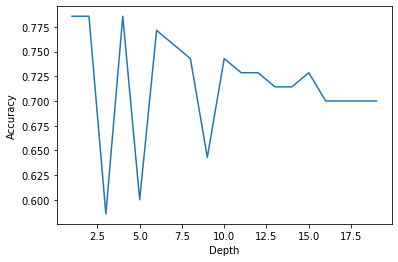

Maximum Accuracy obtained - 


,0
0,0.785714


In [62]:
plt.plot(range(1,20),accud)
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.show()
accuracy1 = pd.DataFrame(accud)
print("Maximum Accuracy obtained - " )
accuracy1.sort_values(by = 0, ascending = False)[0:1]

In [63]:
print("We take depth = 4 as it gives maximum accuracy")
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=2).fit(X_train, y_train)
print("By Jaccard Index, accuracies: ")
print("Train set: ", metrics.accuracy_score(y_train, dtc.predict(X_train)))
print("Test set: ", metrics.accuracy_score(y_test, dtc.predict(X_test)))
print("By F1 index, accuracies: ")
print("Train set: ", metrics.f1_score(y_train, dtc.predict(X_train), average='weighted'))
print("Test set: ", metrics.f1_score(y_test, dtc.predict(X_test), average='weighted'))

We take depth = 4 as it gives maximum accuracy
By Jaccard Index, accuracies: 
Train set:  0.7427536231884058
Test set:  0.7857142857142857
By F1 index, accuracies: 
Train set:  0.6331163939859591
Test set:  0.6914285714285714


# Support Vector Machine


In [64]:
from sklearn import svm 

In [69]:
f1=[]
jg=[]
ker=['linear', 'poly', 'rbf','sigmoid']
for k in ker:
    svms = svm.SVC( kernel = k).fit(X_train,y_train)
    print("For SMV kernel ",k)
    f1.append(metrics.f1_score(y_test,svms.predict(X_test), average='weighted'))
    jg.append(metrics.accuracy_score(y_train, svms.predict(X_train)))
    print("F1 score accuracy: ",metrics.f1_score(y_test,svms.predict(X_test), average='weighted'))
    print("Jaccard index accuracy: ",metrics.accuracy_score(y_train, svms.predict(X_train)))

For SMV kernel  linear
F1 score accuracy:  0.6914285714285714
Jaccard index accuracy:  0.7427536231884058
For SMV kernel  poly
F1 score accuracy:  0.6892857142857144
Jaccard index accuracy:  0.7898550724637681
For SMV kernel  rbf
F1 score accuracy:  0.7275882012724117
Jaccard index accuracy:  0.782608695652174
For SMV kernel  sigmoid
F1 score accuracy:  0.685960591133005
Jaccard index accuracy:  0.7282608695652174


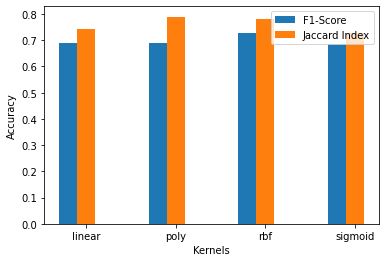

In [76]:
import matplotlib.pyplot as plt
x = np.arange(4)
plt.bar(x-0.2, f1, 0.2)
plt.bar(x, jg, 0.2)
plt.xticks(x, ker)
plt.xlabel("Kernels")
plt.ylabel("Accuracy")
plt.legend(["F1-Score","Jaccard Index"])
plt.show()

# Logistic Regression


In [77]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss

In [78]:
solv=['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
for k in solv:
    lr= LogisticRegression(C = 0.01, solver = k).fit(X_train, y_train)
    print("Solver ",k)
    print('Logloss = ',log_loss(y_test, lr.predict_proba(X_test)))
    print("F1 score accuracy: ",metrics.f1_score(y_test,lr.predict(X_test), average='weighted'))
    print("Jaccard index accuracy: ",metrics.accuracy_score(y_train, lr.predict(X_train)))

Solver  lbfgs
Logloss =  0.48933560490693956
F1 score accuracy:  0.6914285714285714
Jaccard index accuracy:  0.7427536231884058
Solver  saga
Logloss =  0.4893347113465088
F1 score accuracy:  0.6914285714285714
Jaccard index accuracy:  0.7427536231884058
Solver  liblinear
Logloss =  0.5699980927778157
F1 score accuracy:  0.7142857142857142
Jaccard index accuracy:  0.7644927536231884
Solver  newton-cg
Logloss =  0.4893356417828644
F1 score accuracy:  0.6914285714285714
Jaccard index accuracy:  0.7427536231884058
Solver  sag
Logloss =  0.4893362389621554
F1 score accuracy:  0.6914285714285714
Jaccard index accuracy:  0.7427536231884058


In [79]:
print("Best solver is liblinear")

Best solver is liblinear


# Model Evaluation using Test set


In [80]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [81]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


### Load Test set for evaluation


In [82]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


## ENCODING, FEATURE SELECTION AND STANDARDISATION

In [92]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature1 = test_df[['Principal','terms','age','Gender','weekend']]
Feature1 = pd.concat([Feature1,pd.get_dummies(test_df['education'])], axis=1)
Feature1.drop(['Master or Above'], axis = 1,inplace=True)

test_df['loan_status']=test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1])

x_loan_test = Feature1
x_loan_test = preprocessing.StandardScaler().fit(x_loan_test).transform(x_loan_test)
y_loan_test = test_df['loan_status'].values

## F1 SCORE

In [94]:
f_knn = f1_score(y_loan_test, knn.predict(x_loan_test), average='weighted')
f_dtc = f1_score(y_loan_test,dtc.predict(x_loan_test), average='weighted')
f_smv = f1_score(y_loan_test, svms.predict(x_loan_test), average='weighted')
f_lr = f1_score(y_loan_test,lr.predict(x_loan_test), average='weighted')
f1 = [f_knn, f_dtc, f_smv, f_lr]
f1

[0.6468253968253967,
 0.6304176516942475,
 0.6378600823045267,
 0.6304176516942475]

## JACCARD INDEX

In [95]:
j_knn = accuracy_score(y_loan_test, knn.predict(x_loan_test))
j_dtc = accuracy_score(y_loan_test,dtc.predict(x_loan_test))
j_smv = accuracy_score(y_loan_test, svms.predict(x_loan_test))
j_lr = accuracy_score(y_loan_test,lr.predict(x_loan_test))
jac = [f_knn, f_dtc, f_smv, f_lr]
jac

[0.6468253968253967,
 0.6304176516942475,
 0.6378600823045267,
 0.6304176516942475]

## LOGLOSS

In [102]:
lr_ll = metrics.log_loss(y_loan_test, lr.predict_proba(x_loan_test))
ll = ['NA','NA','NA', lr_ll]
ll

['NA', 'NA', 'NA', 0.5164715676240983]

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


In [105]:
algos  = ["KNN", "Decision Tree", "SVM", "Logistic Regression"]
cols = ["Algorithm","Jaccard", "F1-score", "LogLoss"]
rep = [algos, jac, f1, ll]
rep = np.array(rep).T
report = pd.DataFrame(rep, columns=cols)
report

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.6468253968253967,0.6468253968253967,NA
1,Decision Tree,0.6304176516942475,0.6304176516942475,NA
2,SVM,0.6378600823045267,0.6378600823045267,NA
3,Logistic Regression,0.6304176516942475,0.6304176516942475,0.5164715676240983


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
